In [ ]:
from google.colab import files
uploaded=files.upload()

Saving archive (3).zip to archive (3) (1).zip


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv("archive (3).zip")
df.head()


,Age,Gender,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Slope,Num_Major_Vessels,Thalassemia,Diabetes,Smoking_History,Alcohol_Consumption,Physical_Activity_Level,Family_History,BMI,Heart_Failure
0,69,Male,Atypical,106,250,1,ST-T Wave Abnormality,171,0,0.92,Flat,2,Normal,1,Former,Heavy,Low,0,36.92,1
1,32,Male,Non-anginal,124,396,1,Left Ventricular Hypertrophy,73,0,0.92,Downsloping,2,Reversible Defect,1,Current,NaN,Low,0,36.92,1
2,89,Female,Non-anginal,164,256,1,Left Ventricular Hypertrophy,157,0,0.92,Upsloping,1,Fixed Defect,1,Former,NaN,Low,0,36.92,0
3,78,Female,Typical,116,297,1,Normal,163,1,0.92,Flat,1,Reversible Defect,1,Former,Heavy,Low,1,36.92,0
4,38,Male,Non-anginal,88,386,1,ST-T Wave Abnormality,123,1,0.92,Upsloping,3,Fixed Defect,0,Never,Moderate,Low,1,36.92,1


In [ ]:
df.shape

(10000, 20)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Chest_Pain_Type,0
Resting_BP,0
Cholesterol,0
Fasting_Blood_Sugar,0
Resting_ECG,0
Max_Heart_Rate,0
Exercise_Induced_Angina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Chest_Pain_Type          10000 non-null  object 
 3   Resting_BP               10000 non-null  int64  
 4   Cholesterol              10000 non-null  int64  
 5   Fasting_Blood_Sugar      10000 non-null  int64  
 6   Resting_ECG              10000 non-null  object 
 7   Max_Heart_Rate           10000 non-null  int64  
 8   Exercise_Induced_Angina  10000 non-null  int64  
 9   Oldpeak                  10000 non-null  float64
 10  Slope                    10000 non-null  object 
 11  Num_Major_Vessels        10000 non-null  int64  
 12  Thalassemia              10000 non-null  object 
 13  Diabetes                 10000 non-null  int64  
 14  Smoking_History        

In [ ]:
df.describe()

,Age,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Num_Major_Vessels,Diabetes,Family_History,BMI,Heart_Failure
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,58.584900,139.56920,247.206200,0.505400,129.346600,0.507200,9.200000e-01,1.481400,0.501200,0.506300,3.692000e+01,0.503600
std,23.645835,34.86205,86.862739,0.499996,40.316689,0.499973,6.250868e-14,1.117488,0.500024,0.499985,7.176840e-13,0.500012
min,18.000000,80.00000,100.000000,0.000000,60.000000,0.000000,9.200000e-01,0.000000,0.000000,0.000000,3.692000e+01,0.000000
25%,38.000000,109.00000,171.000000,0.000000,95.000000,0.000000,9.200000e-01,0.000000,0.000000,0.000000,3.692000e+01,0.000000
50%,59.000000,140.00000,247.000000,1.000000,130.000000,1.000000,9.200000e-01,1.000000,1.000000,1.000000,3.692000e+01,1.000000
75%,79.000000,170.00000,322.000000,1.000000,164.000000,1.000000,9.200000e-01,2.000000,1.000000,1.000000,3.692000e+01,1.000000
max,99.000000,199.00000,399.000000,1.000000,199.000000,1.000000,9.200000e-01,3.000000,1.000000,1.000000,3.692000e+01,1.000000


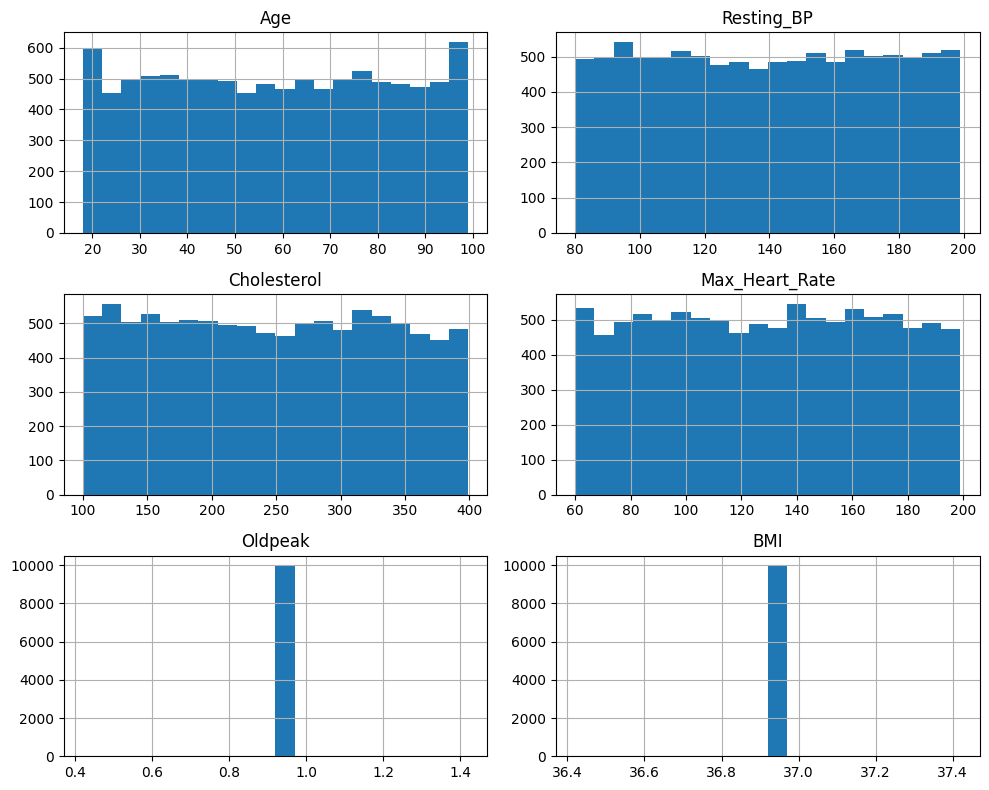

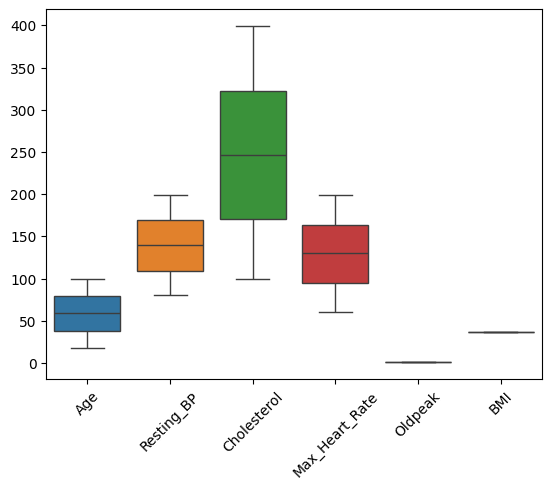

In [ ]:
# Impute missing values (if applicable)
df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)

# Alternatively, remove rows with missing values
df.dropna(inplace=True)
# Histogram for numeric columns
numeric_cols = ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'Oldpeak', 'BMI']
df[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplot for numeric columns to check for outliers
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

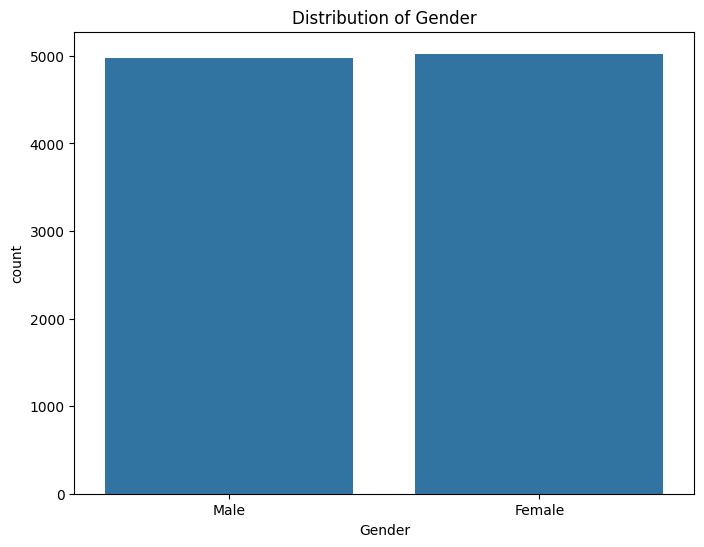

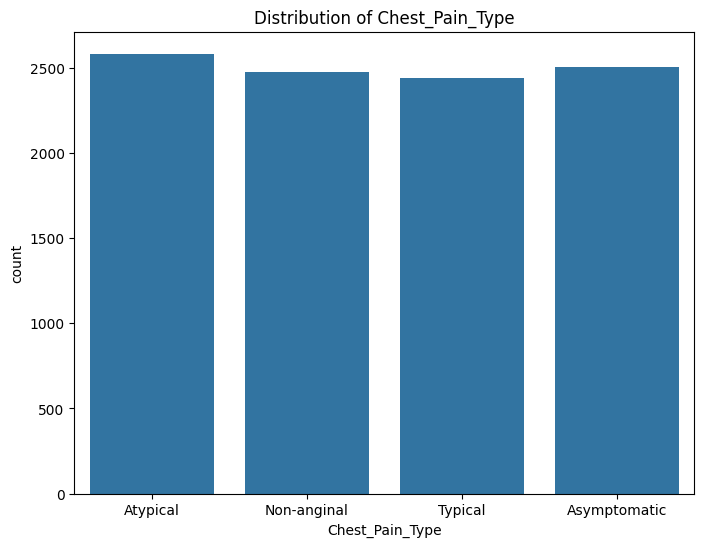

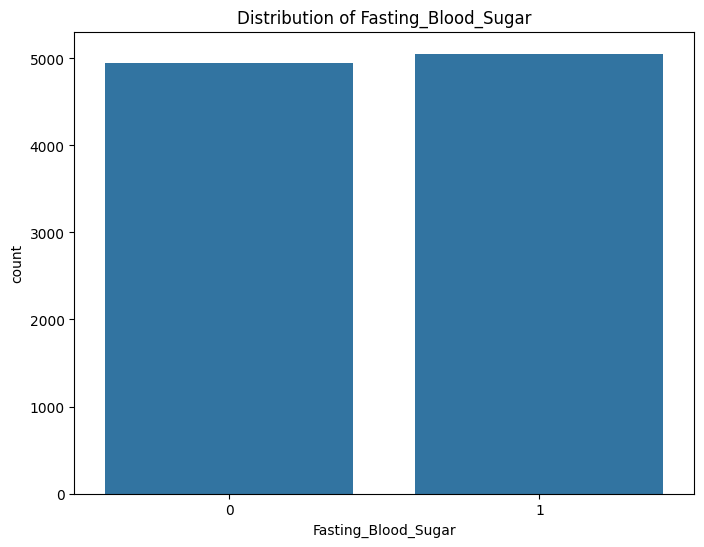

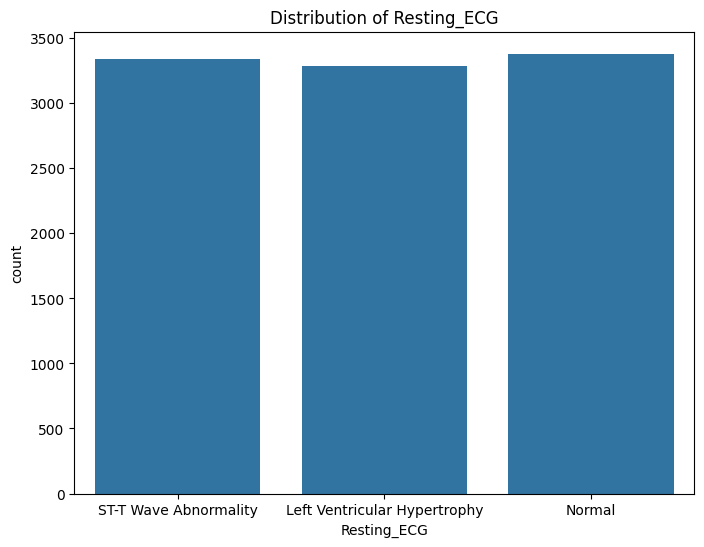

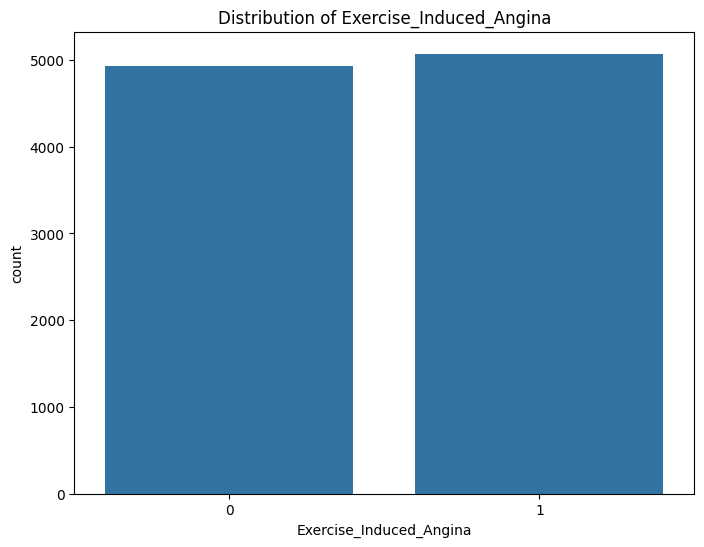

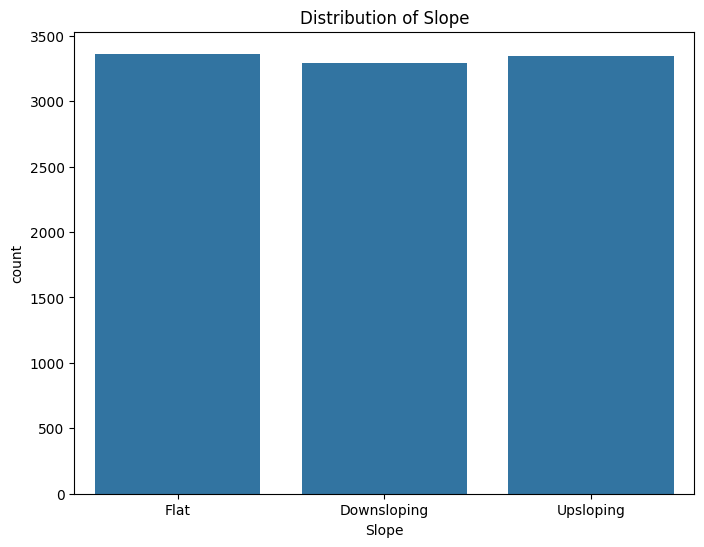

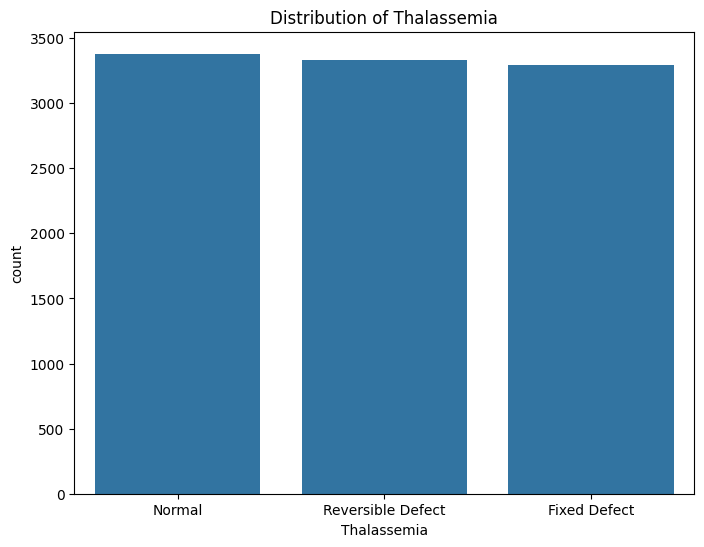

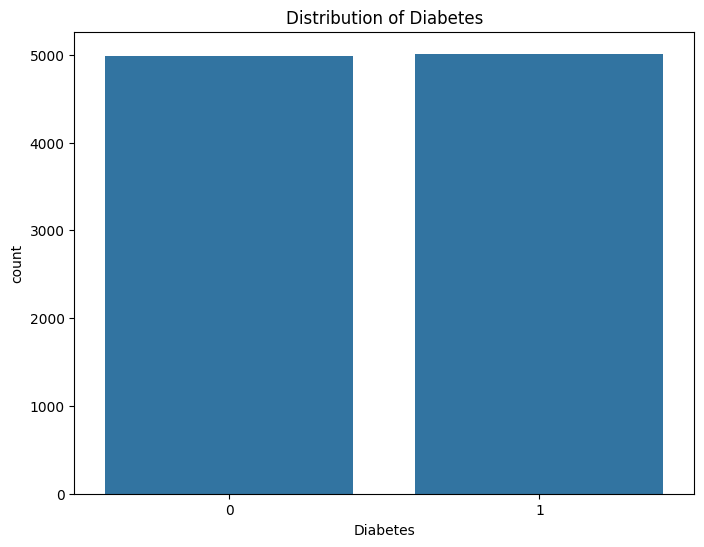

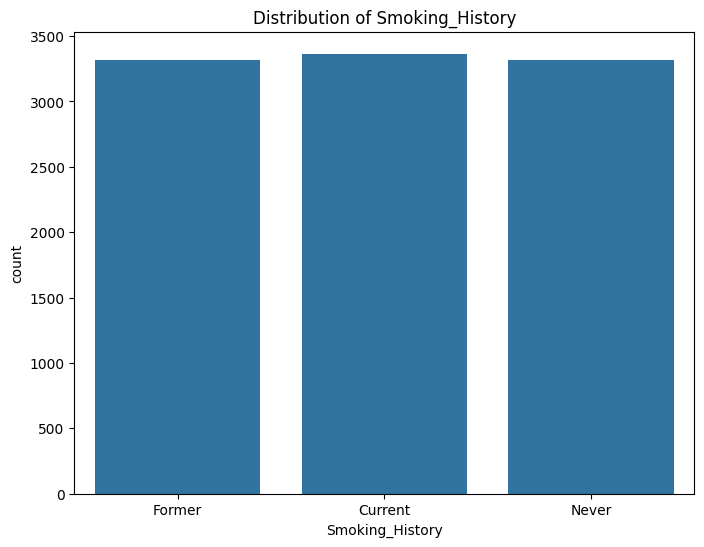

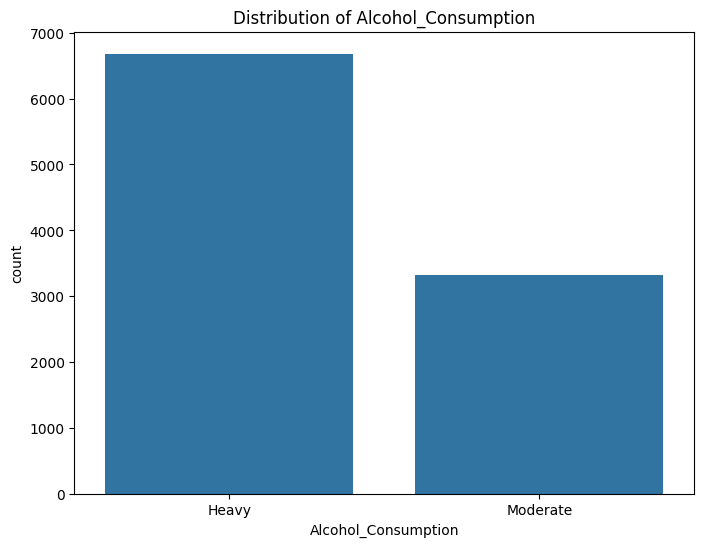

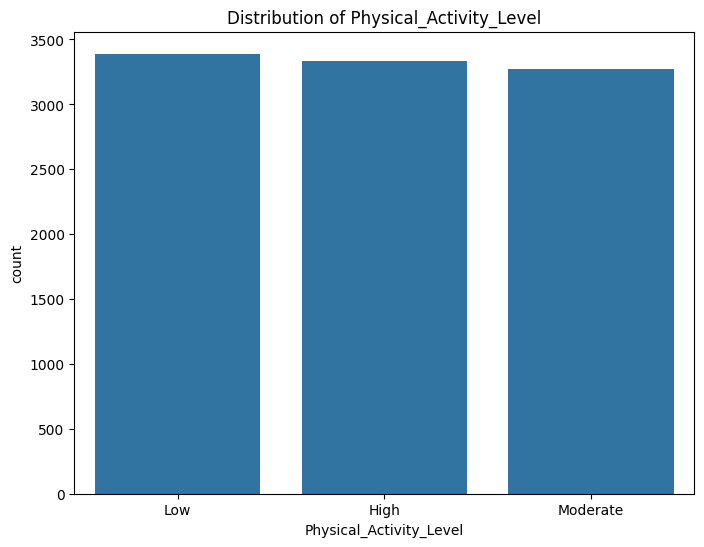

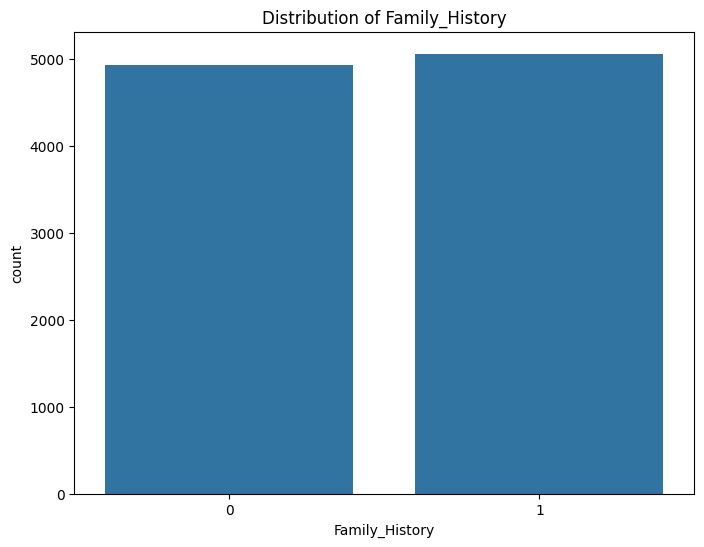

In [ ]:
# Countplot for categorical columns
categorical_cols = ['Gender', 'Chest_Pain_Type', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Exercise_Induced_Angina',
                    'Slope', 'Thalassemia', 'Diabetes', 'Smoking_History', 'Alcohol_Consumption', 'Physical_Activity_Level',
                    'Family_History']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

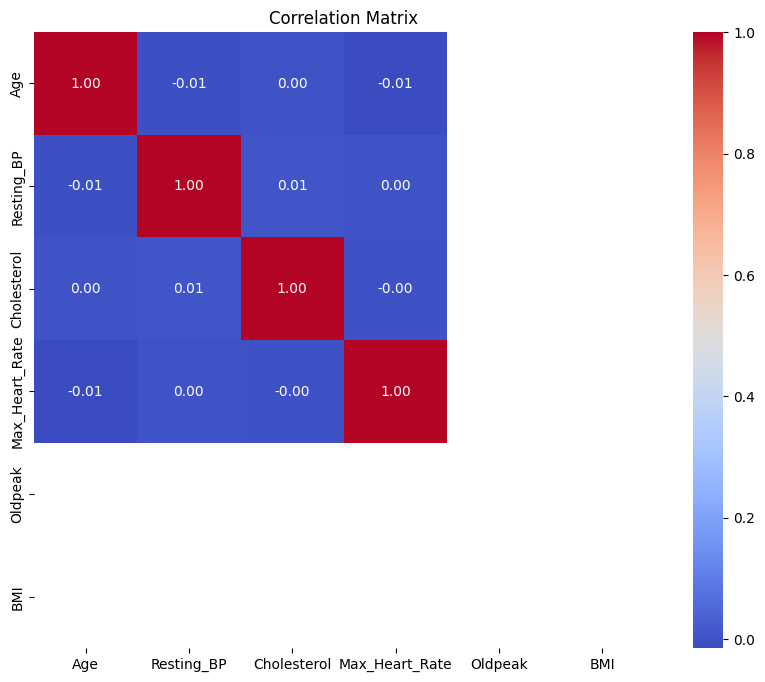

In [ ]:
# Correlation heatmap for numeric columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


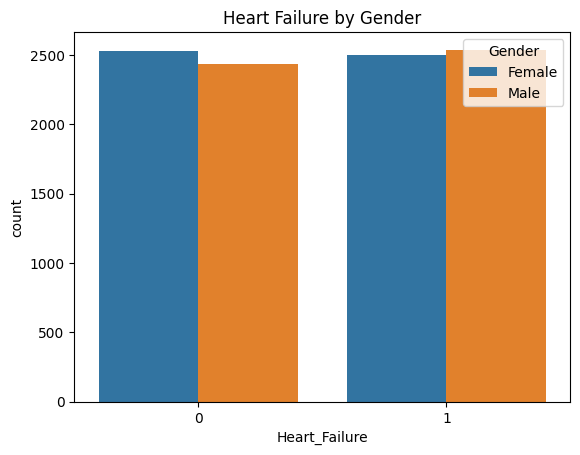

In [ ]:
# Countplot for bivariate categorical analysis
sns.countplot(x='Heart_Failure', hue='Gender', data=df)
plt.title('Heart Failure by Gender')
plt.show()

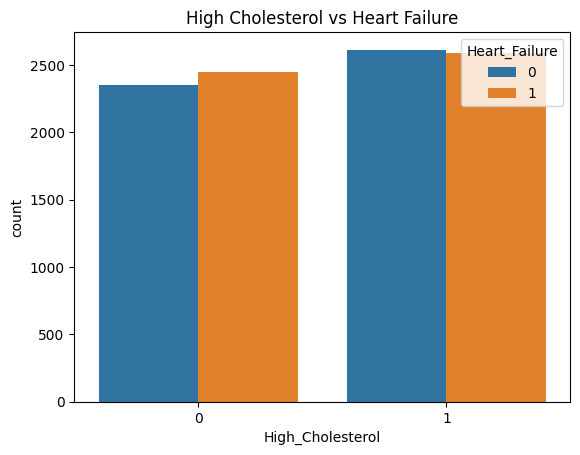

In [ ]:
# Create new feature for high cholesterol
df['High_Cholesterol'] = df['Cholesterol'].apply(lambda x: 1 if x > 240 else 0)
sns.countplot(x='High_Cholesterol', hue='Heart_Failure', data=df)
plt.title('High Cholesterol vs Heart Failure')
plt.show()

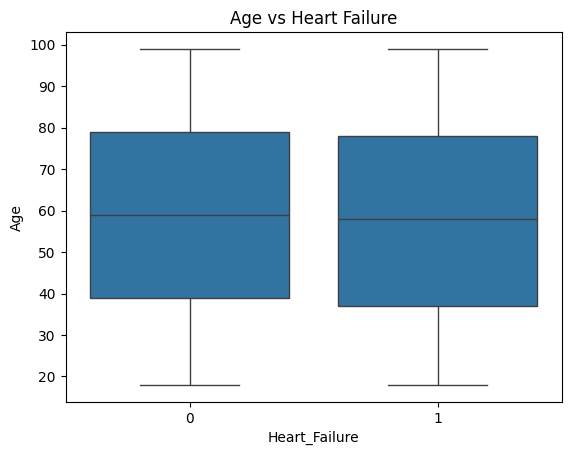

In [ ]:
# Boxplot of Age vs Heart Failure
sns.boxplot(x='Heart_Failure', y='Age', data=df)
plt.title('Age vs Heart Failure')
plt.show()


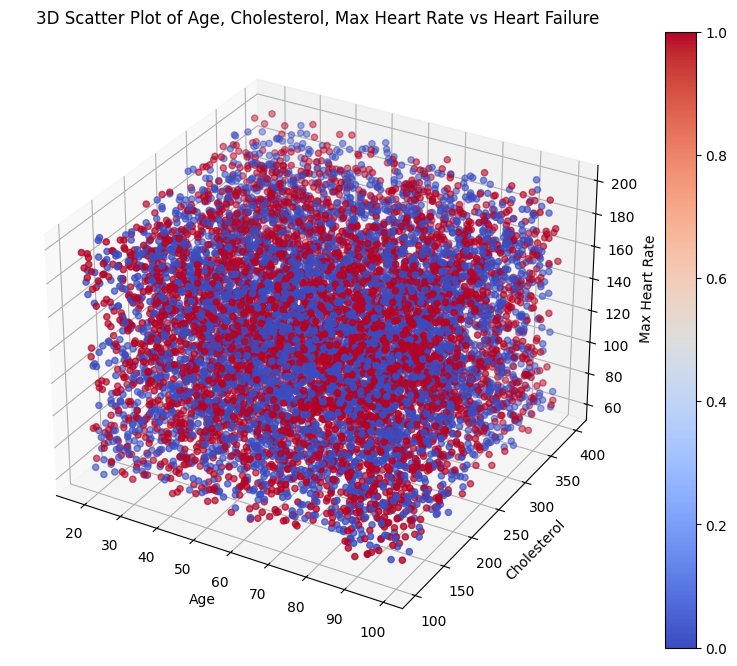

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for Age, Cholesterol, and Max Heart Rate vs Heart Failure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the data
x = df['Age']
y = df['Cholesterol']
z = df['Max_Heart_Rate']
c = df['Heart_Failure']  # color by target variable

# Create the scatter plot
sc = ax.scatter(x, y, z, c=c, cmap='coolwarm', marker='o')

# Add labels
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Max Heart Rate')

# Add a colorbar for the target variable
plt.colorbar(sc)
plt.title('3D Scatter Plot of Age, Cholesterol, Max Heart Rate vs Heart Failure')
plt.show()